<img src="./images/banner.png" width="800">

# K-Nearest Neighbors (KNN) for Classification

K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used for both classification and regression tasks in machine learning. In this lecture, we'll focus on its application in classification problems. It is a supervised learning algorithm that classifies new data points based on the majority class of their K nearest neighbors in the feature space. The algorithm assumes that similar things exist in close proximity, which is known as the "similarity principle."

- **Non-parametric:** KNN doesn't make assumptions about the underlying data distribution.
- **Instance-based:** Also known as lazy learning, KNN doesn't create a generalized model during training but uses the entire training dataset for making predictions.


<img src="./images/instance-based.jpg" width="800">

<img src="./images/ml-models.webp" width="800">

Imagine you're trying to guess a person's favorite music genre based on their age and income. You might look at people with similar age and income and see what genres they prefer. This is essentially what KNN does, but in a high-dimensional space with many features.


💡 **Pro Tip:** Visualizing KNN in 2D or 3D space can help build intuition, but remember that real-world applications often involve many more dimensions.


The 'K' in KNN represents the number of nearest neighbors the algorithm considers when making a prediction.

- If K = 1, the algorithm simply classifies the new point as the same class as its single nearest neighbor.
- For larger K values, the algorithm looks at more neighbors and makes a decision based on the majority class among these neighbors.


❗️ **Important Note:** The choice of K significantly impacts the algorithm's performance and its tendency to overfit or underfit the data.


KNN belongs to the family of instance-based learning algorithms and is often contrasted with model-based learning approaches.

- **Instance-based learning:** These algorithms use the training instances directly to make predictions, without creating an explicit model.
- **Model-based learning:** These algorithms create a mathematical model from the training data, which is then used for predictions (e.g., logistic regression, decision trees).


Understanding KNN's place in the machine learning landscape helps in choosing the right algorithm for a given problem and in comparing its performance with other methods.


Let's consider a basic 2D example to illustrate KNN classification:


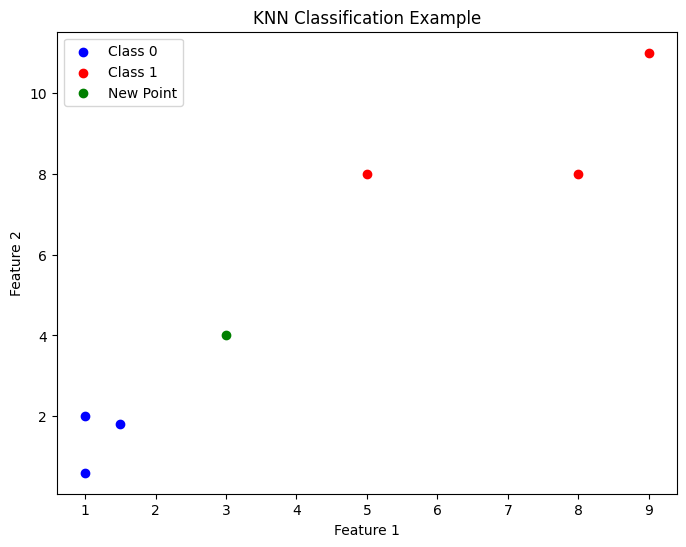

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
y = np.array([0, 0, 1, 1, 0, 1])  # 0: blue class, 1: red class

# New point to classify
new_point = np.array([3, 4])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='blue', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='red', label='Class 1')
plt.scatter(new_point[0], new_point[1], color='green', label='New Point')
plt.legend()
plt.title('KNN Classification Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In this example, we have two classes (blue and red) and a new point (green) to classify. The KNN algorithm would determine the class of this new point based on its K nearest neighbors.


In the subsequent sections, we'll delve deeper into how KNN makes these classifications, the importance of distance metrics, and how to implement and optimize KNN for real-world problems.

**Table of contents**<a id='toc0_'></a>    
- [The KNN Algorithm: How It Works](#toc1_)    
  - [Calculating Distances](#toc1_1_)    
  - [Finding Nearest Neighbors](#toc1_2_)    
  - [Majority Voting](#toc1_3_)    
  - [KNN Decision Boundaries](#toc1_4_)    
- [Distance Metrics in KNN](#toc2_)    
  - [Euclidean Distance](#toc2_1_)    
  - [Manhattan Distance](#toc2_2_)    
  - [Minkowski Distance](#toc2_3_)    
  - [Cosine Similarity](#toc2_4_)    
  - [Choosing the Right Distance Metric](#toc2_5_)    
- [Choosing the Optimal K Value](#toc3_)    
  - [Methods for Selecting K](#toc3_1_)    
  - [Considerations in K Selection](#toc3_2_)    
  - [Automated K Selection](#toc3_3_)    
- [Advantages and Disadvantages of KNN](#toc4_)    
  - [Advantages of KNN](#toc4_1_)    
  - [Disadvantages of KNN](#toc4_2_)    
  - [When to Use KNN](#toc4_3_)    
  - [Alternatives to Consider](#toc4_4_)    
- [Implementing KNN in Python](#toc5_)    
  - [Basic KNN Implementation from Scratch](#toc5_1_)    
  - [Using Scikit-learn's KNN Implementation](#toc5_2_)    
  - [Weighted KNN](#toc5_3_)    
- [Summary](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[The KNN Algorithm: How It Works](#toc0_)

The K-Nearest Neighbors algorithm is conceptually simple yet powerful. Let's dive into the step-by-step process of how KNN makes predictions for classification tasks. It classifies a new data point by looking at the classes of its K nearest neighbors in the feature space and assigning the majority class.


The KNN algorithm follows these main steps:

1. **Load the data**: Prepare your training dataset with features and corresponding labels.
2. **Choose K**: Select the number of nearest neighbors to consider.
3. **Calculate distances**: For a new data point, calculate its distance to all points in the training set.
4. **Find nearest neighbors**: Identify the K training points closest to the new data point.
5. **Vote**: Assign the class label based on the majority class among the K nearest neighbors.


Let's explore each of these steps in more detail.


### <a id='toc1_1_'></a>[Calculating Distances](#toc0_)


The distance calculation is a crucial step in KNN. While various distance metrics can be used (which we'll explore in the next section), the Euclidean distance is most common.


For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$ in n-dimensional space, the Euclidean distance is given by:

$$d(p,q) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}$$


💡 **Pro Tip:** Feature scaling is often necessary before applying KNN to ensure that all features contribute equally to the distance calculation.


### <a id='toc1_2_'></a>[Finding Nearest Neighbors](#toc0_)


Once distances are calculated, the algorithm identifies the K training samples closest to the new data point. This is typically done by sorting the distances in ascending order and selecting the top K.


Here's a simple Python function to find K nearest neighbors:


In [2]:
import numpy as np

def find_nearest_neighbors(X_train, y_train, x_new, K):
    distances = np.sqrt(np.sum((X_train - x_new)**2, axis=1))
    nearest_neighbor_ids = distances.argsort()[:K]
    return y_train[nearest_neighbor_ids]

### <a id='toc1_3_'></a>[Majority Voting](#toc0_)


After identifying the K nearest neighbors, KNN assigns the class label based on the majority class among these neighbors. In case of a tie, it's common to choose the class of the nearest neighbor.


```python
from scipy.stats import mode

def knn_predict(X_train, y_train, x_new, K):
    neighbors = find_nearest_neighbors(X_train, y_train, x_new, K)
    return mode(neighbors)[0][0]
```


### <a id='toc1_4_'></a>[KNN Decision Boundaries](#toc0_)


The decision boundaries in KNN are implicitly defined by the training data and can be quite complex. As K increases, the decision boundary generally becomes smoother.


🤔 **Why This Matters:** Understanding how KNN forms decision boundaries helps in interpreting its predictions and choosing an appropriate K value.


Let's visualize KNN decision boundaries for different K values:


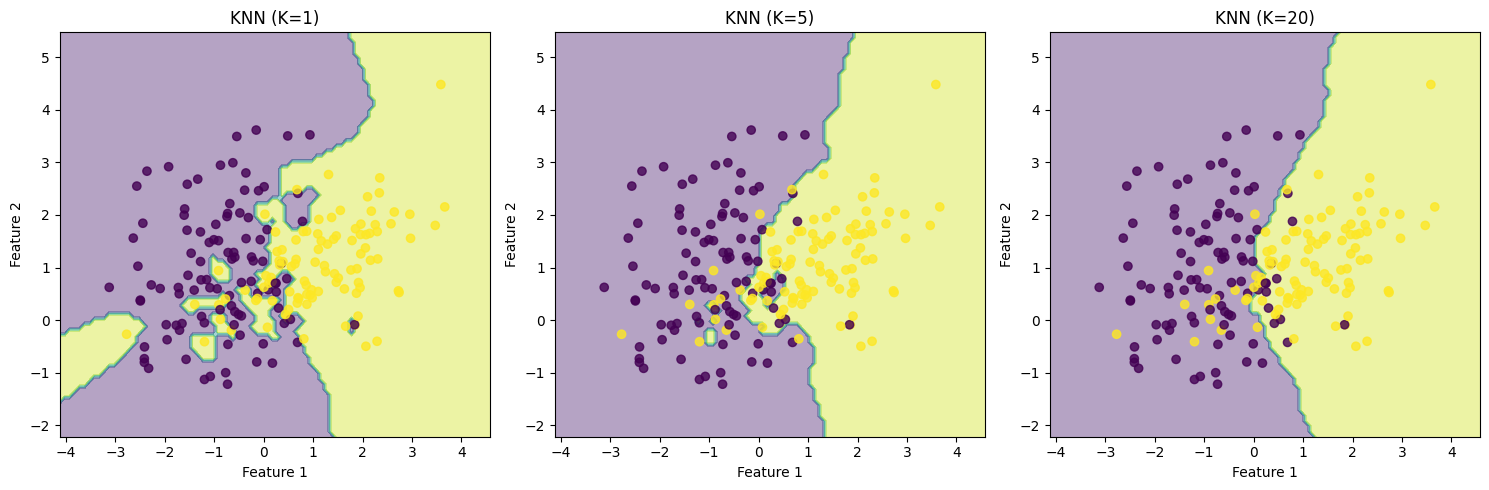

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
)

# Plot decision boundaries for different K values
plt.figure(figsize=(15, 5))
for i, k in enumerate([1, 5, 20]):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(f"KNN (K={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

This visualization demonstrates how the decision boundary changes with different K values, illustrating the trade-off between model complexity and generalization.


❗️ **Important Note:** While a smaller K can capture more complex patterns, it may also lead to overfitting. Conversely, a larger K results in smoother decision boundaries but might miss important patterns in the data.


Understanding these core mechanics of the KNN algorithm provides a solid foundation for implementing, tuning, and interpreting KNN models in practice.

## <a id='toc2_'></a>[Distance Metrics in KNN](#toc0_)

The choice of distance metric is crucial in KNN as it directly affects how the algorithm measures the similarity between data points. Different distance metrics can lead to different classifications, especially in high-dimensional spaces.


🔑 **Key Concept:** The distance metric defines how "closeness" is measured between data points in the feature space.


<img src="./images/distance-metrics.png" width="800">


### <a id='toc2_1_'></a>[Euclidean Distance](#toc0_)


Euclidean distance is the most commonly used metric in KNN. It measures the straight-line distance between two points in Euclidean space.


For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$ in n-dimensional space:

$d_{Euclidean}(p,q) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}$


In [4]:
import numpy as np

def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q)**2))

💡 **Pro Tip:** Euclidean distance works well when the data is dense or continuous, but it can struggle with high-dimensional data due to the "curse of dimensionality".


### <a id='toc2_2_'></a>[Manhattan Distance](#toc0_)


Manhattan distance, also known as L1 distance or city block distance, calculates the sum of the absolute differences of the coordinates.

$d_{Manhattan}(p,q) = \sum_{i=1}^n |p_i - q_i|$


In [5]:
def manhattan_distance(p, q):
    return np.sum(np.abs(p - q))

Manhattan distance can be preferable when dealing with high-dimensional data or when the feature space resembles a grid-like structure.


### <a id='toc2_3_'></a>[Minkowski Distance](#toc0_)


Minkowski distance is a generalization of both Euclidean and Manhattan distances. It's defined by the parameter $r$, where $r=1$ gives Manhattan distance, and $r=2$ gives Euclidean distance.

$d_{Minkowski}(p,q) = (\sum_{i=1}^n |p_i - q_i|^r)^{\frac{1}{r}}$


In [6]:
def minkowski_distance(p, q, r):
    return np.power(np.sum(np.abs(p - q)**r), 1/r)

### <a id='toc2_4_'></a>[Cosine Similarity](#toc0_)


While not strictly a distance metric, cosine similarity is often used in KNN, especially for text classification or when dealing with sparse high-dimensional data. It measures the cosine of the angle between two vectors.

$similarity_{Cosine}(p,q) = \frac{p \cdot q}{||p|| ||q||} = \frac{\sum_{i=1}^n p_i q_i}{\sqrt{\sum_{i=1}^n p_i^2} \sqrt{\sum_{i=1}^n q_i^2}}$


To convert cosine similarity to a distance metric, we can use:

$d_{Cosine}(p,q) = 1 - similarity_{Cosine}(p,q)$


In [7]:
def cosine_distance(p, q):
    return 1 - np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))

❗️ **Important Note:** Cosine similarity focuses on the direction of the vectors, not their magnitude. This can be beneficial when the magnitude of the vectors is not important, such as in text analysis.


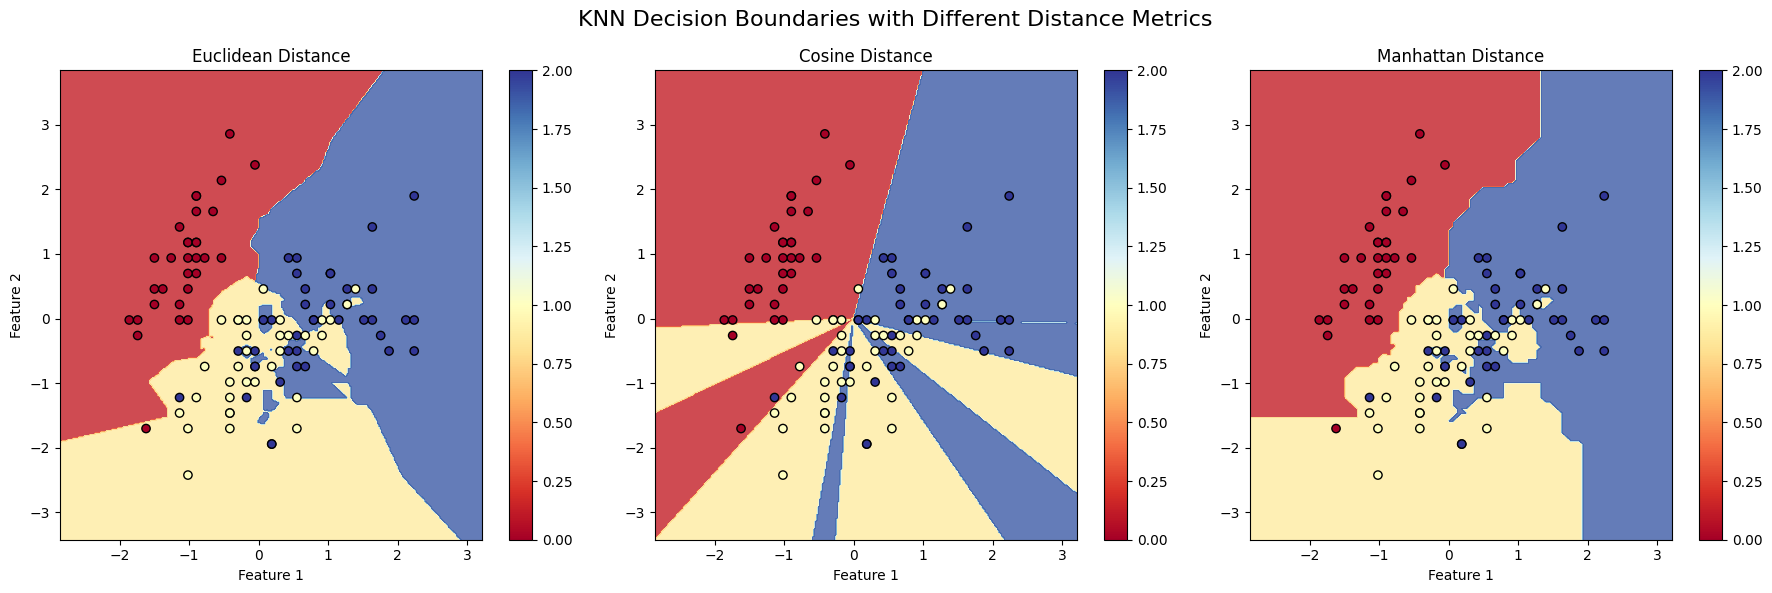

Classification Accuracies:
Euclidean Distance: 0.8000
Cosine Distance: 0.7111
Manhattan Distance: 0.7556


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # We'll use only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the distance metrics and their corresponding KNN classifiers
distance_metrics = ['euclidean', 'cosine', 'manhattan']
classifiers = {
    metric: KNeighborsClassifier(n_neighbors=3, metric=metric)
    for metric in distance_metrics
}

# Train the classifiers
for clf in classifiers.values():
    clf.fit(X_train_scaled, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot the decision boundaries and scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('KNN Decision Boundaries with Different Distance Metrics', fontsize=16)

for ax, (metric, clf) in zip(axs, classifiers.items()):
    # Plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot scatter points
    scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='black')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'{metric.capitalize()} Distance')

    # Add a color bar
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

# Print classification accuracies
print("Classification Accuracies:")
for metric, clf in classifiers.items():
    accuracy = clf.score(X_test_scaled, y_test)
    print(f"{metric.capitalize()} Distance: {accuracy:.4f}")

### <a id='toc2_5_'></a>[Choosing the Right Distance Metric](#toc0_)


The choice of distance metric depends on the nature of your data and the problem at hand:

1. **Euclidean Distance**: Good for continuous data in low-dimensional space.
2. **Manhattan Distance**: Useful for grid-like features or when differences in individual features are important.
3. **Cosine Similarity**: Effective for high-dimensional sparse data or when the magnitude of features is less important than their direction.
4. **Minkowski Distance**: Provides flexibility to adjust between Manhattan and Euclidean distances.


💡 **Pro Tip:** Experiment with different distance metrics and use cross-validation to determine which works best for your specific dataset and problem.


Understanding these distance metrics and their implications is crucial for effectively implementing and tuning KNN algorithms, especially when dealing with diverse types of data and classification problems.

## <a id='toc3_'></a>[Choosing the Optimal K Value](#toc0_)

Selecting the appropriate value for K is crucial in KNN as it significantly impacts the model's performance and generalization ability. The optimal K value strikes a balance between underfitting (high bias) and overfitting (high variance).


The optimal K value depends on the specific dataset and problem, and it's typically determined through empirical methods. Here is how K affects the model:

- **Small K**: Leads to a more flexible model that can capture complex patterns but is sensitive to noise.
- **Large K**: Results in a smoother decision boundary, potentially missing important patterns but more robust to outliers.


Understanding how K affects the model helps in interpreting results and making informed decisions about model complexity.


### <a id='toc3_1_'></a>[Methods for Selecting K](#toc0_)


**Cross-validation** is one of the most common and effective methods for selecting K. It involves splitting the data into training and validation sets multiple times and evaluating the model's performance for different K values.


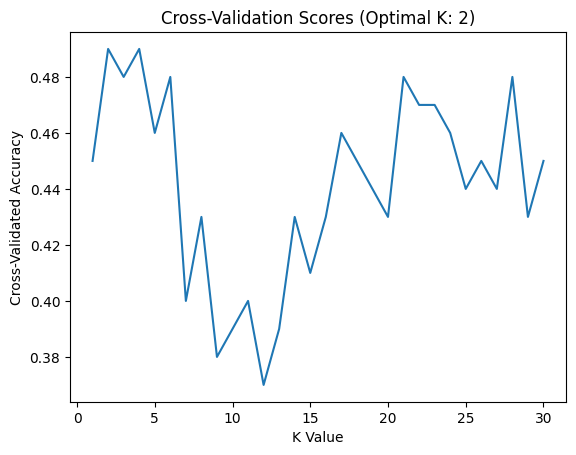

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_k(X, y, k_range):
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
        k_scores.append(scores.mean())

    return k_range[np.argmax(k_scores)]

# Example usage
X, y = np.random.rand(100, 2), np.random.randint(0, 2, 100)
k_range = range(1, 31)
optimal_k = find_optimal_k(X, y, k_range)

plt.plot(k_range, [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5, scoring='accuracy').mean() for k in k_range])
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.title(f'Cross-Validation Scores (Optimal K: {optimal_k})')
plt.show()

💡 **Pro Tip:** Use odd K values to avoid ties in binary classification problems.


The **elbow method** involves plotting the model's performance against a range of K values and looking for the "elbow point" where the rate of improvement slows significantly.


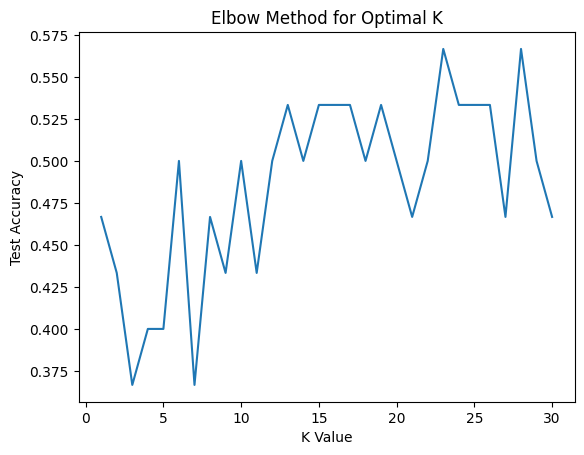

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def elbow_method(X, y, k_range):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    test_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_scores.append(accuracy_score(y_test, knn.predict(X_test)))

    plt.plot(k_range, test_scores)
    plt.xlabel('K Value')
    plt.ylabel('Test Accuracy')
    plt.title('Elbow Method for Optimal K')
    plt.show()

# Example usage
elbow_method(X, y, range(1, 31))

### <a id='toc3_2_'></a>[Considerations in K Selection](#toc0_)


1. **Dataset Size:**

- For larger datasets, larger K values can be more appropriate as they reduce the impact of noise.
- For smaller datasets, smaller K values might be necessary to capture patterns effectively.


2. **Dimensionality**:

- In high-dimensional spaces, the concept of "nearest neighbors" becomes less meaningful due to the curse of dimensionality.
- Consider dimensionality reduction techniques or using distance metrics that perform well in high dimensions.


❗️ **Important Note:** As the number of features increases, you may need to increase the size of your training set exponentially to maintain the same level of model performance.


3. **Class Imbalance**:

- In imbalanced datasets, choosing K based solely on accuracy can be misleading.
- Consider using other metrics like F1-score or balanced accuracy, or techniques like stratified cross-validation.


In [11]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def find_optimal_k_imbalanced(X, y, k_range):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    k_scores = []

    for k in k_range:
        f1_scores = []
        for train_index, val_index in skf.split(X, y):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)
            f1_scores.append(f1_score(y_val, y_pred, average='weighted'))

        k_scores.append(np.mean(f1_scores))

    return k_range[np.argmax(k_scores)]

# Example usage with imbalanced dataset
X_imb, y_imb = np.random.rand(1000, 2), np.random.choice([0, 1], size=1000, p=[0.9, 0.1])
optimal_k_imb = find_optimal_k_imbalanced(X_imb, y_imb, range(1, 31))
print(f"Optimal K for imbalanced dataset: {optimal_k_imb}")

Optimal K for imbalanced dataset: 4


### <a id='toc3_3_'></a>[Automated K Selection](#toc0_)


Some libraries offer automated K selection. For example, scikit-learn's `GridSearchCV` can be used to automatically find the best K:


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

print(f"Best K: {grid_search.best_params_['n_neighbors']}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Best K: 2
Best Score: 0.4900


💡 **Pro Tip:** While automated methods are convenient, always validate the results and consider the specific characteristics of your dataset.


Choosing the optimal K value is more of an art than a science. It requires a combination of empirical methods, domain knowledge, and consideration of the specific characteristics of your dataset and problem. Regular validation and adjustment as new data becomes available are key to maintaining an effective KNN model.

## <a id='toc4_'></a>[Advantages and Disadvantages of KNN](#toc0_)

K-Nearest Neighbors (KNN) is a versatile and intuitive algorithm, but like any machine learning method, it comes with its own set of strengths and weaknesses. Understanding these can help you decide when to use KNN and how to mitigate its limitations.


KNN's simplicity is both its strength and weakness, making it easy to implement but potentially less suitable for complex, high-dimensional problems.


### <a id='toc4_1_'></a>[Advantages of KNN](#toc0_)


1. **Simplicity and Interpretability**:

KNN is one of the most straightforward machine learning algorithms to understand and implement.


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Simple KNN implementation
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

KNN's simplicity makes it an excellent choice for baseline models or when you need to quickly prototype a solution.


2. **Non-parametric Nature**:

KNN doesn't make assumptions about the underlying data distribution, making it flexible for various types of data.


3. **Versatility**:

KNN can be used for both classification and regression tasks, and it's effective for multi-class problems.


In [14]:
from sklearn.neighbors import KNeighborsRegressor

# KNN for regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_reg.predict(X_test)

array([1.2, 0. , 2. , 1.4, 1.2, 0. , 1.2, 1.6, 1.4, 1.4, 2. , 0. , 0. ,
       0. , 0. , 2. , 1.4, 1.2, 1.4, 1.6, 0. , 1.2, 0. , 1.6, 2. , 1.4,
       1.4, 2. , 0. , 0. , 0. , 0. , 1.6, 0. , 0. , 1.6, 2. , 0. , 0. ,
       0. , 1.4, 1.8, 1.6, 0. , 0. ])

4. **No Training Phase**:

KNN is a lazy learning algorithm, meaning it doesn't have a training phase. This can be advantageous when dealing with dynamic datasets.


The lack of a training phase means KNN can quickly adapt to new data without the need for retraining.


### <a id='toc4_2_'></a>[Disadvantages of KNN](#toc0_)


1. **Computational Complexity**:

KNN can be computationally expensive, especially for large datasets, as it needs to calculate the distance to all other points for each prediction.


❗️ **Important Note:** The time complexity for predictions is O(nd), where n is the number of samples and d is the number of features.


To illustrate this, let's compare the prediction time for different dataset sizes:


In [15]:
import time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def measure_prediction_time(n_samples, n_features):
    X = np.random.rand(n_samples, n_features)
    y = np.random.randint(0, 2, n_samples)
    X_test = np.random.rand(1000, n_features)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)

    start_time = time.time()
    knn.predict(X_test)
    end_time = time.time()

    return end_time - start_time

sizes = [1000, 10000, 100000]
times = [measure_prediction_time(size, 10) for size in sizes]

for size, t in zip(sizes, times):
    print(f"Prediction time for {size} samples: {t:.4f} seconds")

Prediction time for 1000 samples: 0.0523 seconds
Prediction time for 10000 samples: 0.0561 seconds
Prediction time for 100000 samples: 0.1059 seconds


2. **Curse of Dimensionality**:

KNN's performance degrades in high-dimensional spaces, where the concept of "nearest" becomes less meaningful.


3. **Sensitivity to Imbalanced Data**:

KNN can be biased towards the majority class in imbalanced datasets. To mitigate this, you can use techniques like weighted KNN.

4. **Sensitive to Noisy Data and Outliers**:

KNN doesn't distinguish between meaningful and noisy features, making it susceptible to outliers.


5. **Need for Feature Scaling**:

KNN is sensitive to the scale of features, requiring careful preprocessing of the data.


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

KNeighborsClassifier()

### <a id='toc4_3_'></a>[When to Use KNN](#toc0_)


KNN is particularly useful in the following scenarios:

1. When you need a simple, interpretable model for a baseline or quick prototyping.
2. For problems where the decision boundary is highly irregular.
3. In recommendation systems or for anomaly detection.
4. When you have a small to medium-sized dataset with low dimensionality.


### <a id='toc4_4_'></a>[Alternatives to Consider](#toc0_)


When KNN's limitations become significant, consider these alternatives:

1. **Decision Trees or Random Forests**: For better handling of high-dimensional data and feature importance.
2. **Support Vector Machines**: For complex decision boundaries and better performance in high-dimensional spaces.
3. **Neural Networks**: For large-scale, complex problems with abundant data.


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Support Vector Machine
svm = SVC(kernel='rbf', random_state=42)

# Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Compare performances
models = [KNeighborsClassifier(), rf, svm, nn]
model_names = ['KNN', 'Random Forest', 'SVM', 'Neural Network']

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")

KNN Accuracy: 0.7778
Random Forest Accuracy: 0.7333
SVM Accuracy: 0.8000
Neural Network Accuracy: 0.8222


Understanding these advantages and disadvantages allows you to make informed decisions about when to use KNN and how to address its limitations. While KNN has its challenges, its simplicity and interpretability make it a valuable tool in many machine learning applications.

## <a id='toc5_'></a>[Implementing KNN in Python](#toc0_)

While scikit-learn provides an efficient implementation of KNN, understanding how to implement the algorithm from scratch can deepen your understanding of its mechanics. In this section, we'll walk through a basic implementation of KNN and then explore how to use scikit-learn's KNN for more advanced applications.


Implementing KNN involves calculating distances, finding the K nearest neighbors, and making predictions based on those neighbors.


### <a id='toc5_1_'></a>[Basic KNN Implementation from Scratch](#toc0_)


Let's start by implementing a simple version of KNN for classification:


In [18]:
import numpy as np
from collections import Counter

class SimpleKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Example usage
X_train = np.array([[1, 2], [2, 3], [3, 1], [4, 2], [5, 4]])
y_train = np.array([0, 0, 1, 1, 1])

knn = SimpleKNN(k=3)
knn.fit(X_train, y_train)

In [19]:
X_test = np.array([[3, 2], [4.5, 3]])
predictions = knn.predict(X_test)
print("Predictions:", predictions)

Predictions: [1 1]


💡 **Pro Tip:** This basic implementation is great for learning, but for real-world applications, use optimized libraries like scikit-learn for better performance.


### <a id='toc5_2_'></a>[Using Scikit-learn's KNN Implementation](#toc0_)


Scikit-learn's KNN implementation offers more features and optimizations:


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


### <a id='toc5_3_'></a>[Weighted KNN](#toc0_)


In weighted KNN, closer neighbors have more influence on the prediction:


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Uniform weighting (default)
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Distance-based weighting
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Compare performances
models = [knn_uniform, knn_distance]
model_names = ['Uniform Weights', 'Distance Weights']

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")

Uniform Weights Accuracy: 1.0000
Distance Weights Accuracy: 1.0000


❗️ **Important Note:** While these implementations provide a solid foundation, remember that real-world applications often require additional considerations such as feature scaling, hyperparameter tuning, and handling large datasets efficiently.


By implementing KNN from scratch and exploring scikit-learn's capabilities, you've gained a deeper understanding of how the algorithm works and how to apply it in various scenarios. This knowledge will serve as a strong base for more advanced machine learning tasks and optimizations.

## <a id='toc6_'></a>[Summary](#toc0_)

In this lecture, we've explored the K-Nearest Neighbors algorithm, a fundamental and intuitive approach to classification in machine learning. Let's recap the key points we've covered:

1. **KNN Basics:** 
   - KNN is a non-parametric, instance-based learning algorithm.
   - It classifies new data points based on the majority class of their K nearest neighbors.

2. **Algorithm Mechanics:**
   - KNN involves calculating distances, finding the K nearest neighbors, and making predictions through majority voting.
   - The choice of K is crucial and affects the model's performance.

3. **Distance Metrics:**
   - Various distance metrics can be used, including Euclidean, Manhattan, and Minkowski distances.
   - The choice of distance metric can significantly impact the model's performance.

4. **Advantages and Disadvantages:**
   - Pros: Simple, versatile, no training phase, and easy to interpret.
   - Cons: Computationally expensive for large datasets, sensitive to irrelevant features and the curse of dimensionality.

5. **Implementation:**
   - We explored both a basic implementation from scratch and the use of scikit-learn's optimized version.
   - Advanced techniques like weighted KNN and KNN for regression were introduced.

6. **Practical Considerations:**
   - Feature scaling is crucial for KNN's performance.
   - Cross-validation can be used to find the optimal K value.
   - For large datasets, approximate nearest neighbor algorithms might be necessary.


💡 **Pro Tip:** While KNN is straightforward, its effectiveness often lies in the preprocessing steps and the careful selection of hyperparameters. Always consider your data's characteristics when applying KNN.


KNN is particularly useful in scenarios where:
- You need a simple, interpretable model.
- The decision boundary is highly irregular.
- You're working with a small to medium-sized dataset.
- You're dealing with recommendation systems or anomaly detection.


As you continue your machine learning journey, consider exploring:
- More advanced nearest neighbor algorithms like ball trees or KD trees.
- Ensemble methods that incorporate KNN.
- The application of KNN in feature selection or dimensionality reduction techniques.


🤔 **Why This Matters:** Understanding KNN provides a solid foundation for grasping more complex machine learning algorithms. Its intuitive nature makes it an excellent starting point for developing a deeper understanding of how machine learning models make decisions based on data proximity and similarity.


By mastering KNN, you've taken an important step in your machine learning education. This knowledge will serve as a building block for understanding more advanced classification techniques and the broader landscape of machine learning algorithms.